In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

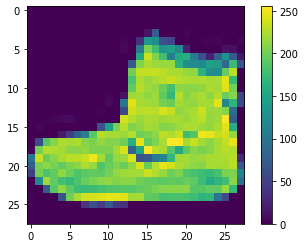

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

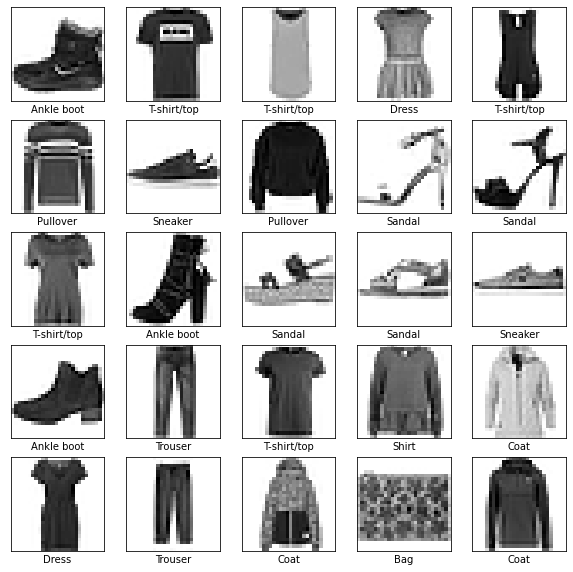

In [9]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**budowa modelu uczącego się w oparciu o prostą sieć neuronową.** Warstwa wejściowa -> obrazy o rozdzielczości 28x28 pikseli.
warstwa ukryta -> algorytm 'relu' (funkcja aktywacji)
*warstwa wyjściowa -> 10 klas*

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
model.fit(train_images,train_labels,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1143 - accuracy: 0.9577
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1144 - accuracy: 0.9578
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1080 - accuracy: 0.9592
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1049 - accuracy: 0.9608
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1059 - accuracy: 0.9602
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1062 - accuracy: 0.9597
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1013 - accuracy: 0.9618
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0984 - accuracy: 0.9635
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1007 - accuracy: 0.9623
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.096

In [19]:
#ocena dokładności -> accuracy
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"\nTest dokładności: {test_acc}")

313/313 - 0s - loss: 0.5467 - accuracy: 0.8836 - 322ms/epoch - 1ms/step

Test dokładności: 0.8835999965667725


In [20]:
#Prognoza
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

In [26]:
def plot_image(i,predictions_array,true_label,img):
    true_label, img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]), 
               color=color)

In [28]:
def plot_value_arrray(i,predictions_array,true_label):
    true_label= true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

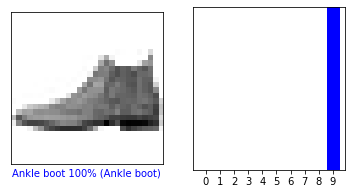

In [29]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_arrray(i,predictions[i],test_labels)
plt.show()

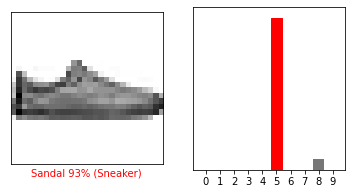

In [30]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_arrray(i,predictions[i],test_labels)
plt.show()

In [31]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols

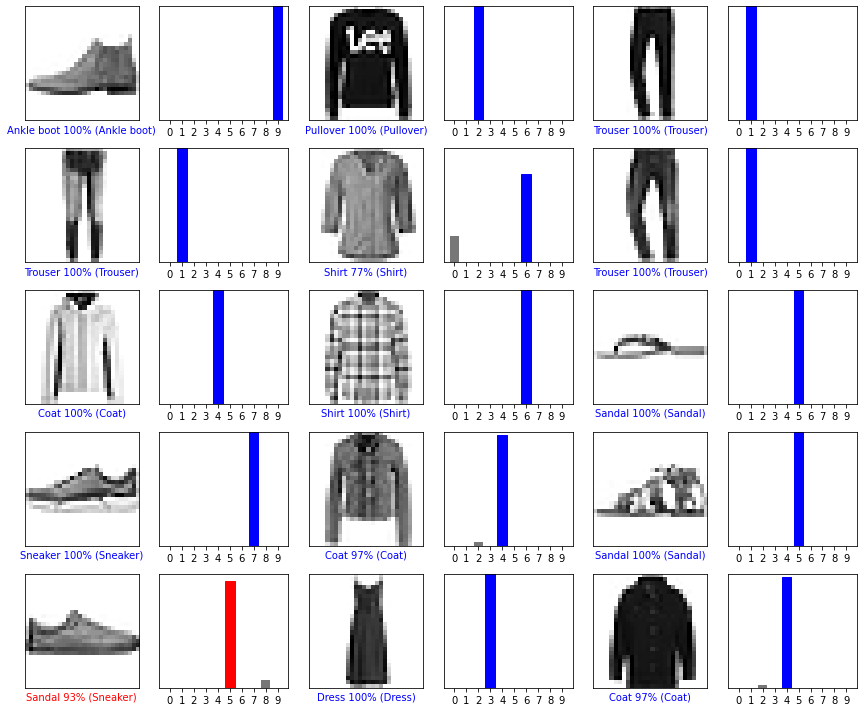

In [32]:
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_arrray(i,predictions[i],test_labels)

plt.tight_layout()
plt.show()

**Jak użyć wyszkolonego modelu?**

In [33]:
img = test_images[1]

In [35]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.2388870e-07 5.3792100e-28 9.9999964e-01 6.2164103e-25 1.9833449e-07
  2.7499722e-26 3.0797258e-09 1.8952125e-31 1.3728810e-26 5.0556861e-30]]


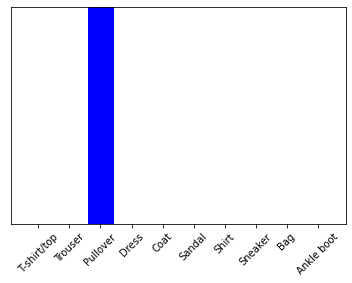

In [43]:
plot_value_arrray(1,predictions_single[0],test_labels) 
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()